<a href="https://colab.research.google.com/github/Hareesh108/REGex_DataScience_Tasks/blob/main/Leaf_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Leaf Classification**

**Hareesh Devaba Bhittam**

In [4]:
#import all libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
for dirname, _, filenames in os.walk('/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import warnings
warnings.filterwarnings("ignore")

In [7]:
train_df = pd.read_csv('/content/train.csv.zip')
test_df = pd.read_csv('/content/test.csv.zip')
train_df.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,margin11,margin12,margin13,margin14,margin15,margin16,margin17,margin18,margin19,margin20,margin21,margin22,margin23,margin24,margin25,margin26,margin27,margin28,margin29,margin30,margin31,margin32,margin33,margin34,margin35,margin36,margin37,margin38,...,texture25,texture26,texture27,texture28,texture29,texture30,texture31,texture32,texture33,texture34,texture35,texture36,texture37,texture38,texture39,texture40,texture41,texture42,texture43,texture44,texture45,texture46,texture47,texture48,texture49,texture50,texture51,texture52,texture53,texture54,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,0.033203,0.013672,0.019531,0.066406,0.000000,0.029297,0.0,0.031250,0.011719,0.000000,0.025391,0.023438,0.001953,0.0,0.015625,0.000000,0.031250,0.000000,0.013672,0.029297,0.015625,0.011719,0.003906,0.025391,0.000000,0.001953,0.011719,0.009766,0.041016,...,0.008789,0.015625,0.044922,0.000000,0.037109,0.012695,0.028320,0.000000,0.019531,0.026367,0.005859,0.0,0.004883,0.016602,0.034180,0.056641,0.006836,0.000977,0.022461,0.037109,0.004883,0.021484,0.035156,0.000977,0.004883,0.015625,0.000000,0.0,0.006836,0.037109,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,0.000000,0.007812,0.003906,0.027344,0.023438,0.000000,0.033203,0.0,0.009766,0.009766,0.007812,0.007812,0.019531,0.007812,0.0,0.000000,0.007812,0.027344,0.003906,0.037109,0.007812,0.048828,0.054688,0.027344,0.003906,0.000000,0.000000,0.003906,0.013672,0.033203,...,0.050781,0.001953,0.021484,0.003906,0.027344,0.023438,0.062500,0.000000,0.038086,0.000000,0.019531,0.0,0.001953,0.003906,0.015625,0.004883,0.104490,0.000000,0.061523,0.007812,0.008789,0.013672,0.011719,0.001953,0.035156,0.007812,0.000000,0.0,0.053711,0.036133,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,0.000000,0.044922,0.007812,0.011719,0.021484,0.001953,0.025391,0.0,0.009766,0.011719,0.007812,0.005859,0.041016,0.001953,0.0,0.015625,0.000000,0.009766,0.001953,0.009766,0.009766,0.015625,0.005859,0.000000,0.017578,0.007812,0.005859,0.009766,0.019531,0.042969,...,0.000977,0.000000,0.000977,0.003906,0.035156,0.015625,0.027344,0.000000,0.000000,0.008789,0.015625,0.0,0.000000,0.011719,0.000977,0.000977,0.000000,0.000000,0.000000,0.005859,0.022461,0.020508,0.021484,0.056641,0.010742,0.008789,0.000000,0.0,0.000977,0.000000,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,0.013672,0.017578,0.001953,0.019531,0.001953,0.003906,0.035156,0.0,0.005859,0.000000,0.001953,0.003906,0.039062,0.009766,0.0,0.009766,0.005859,0.027344,0.001953,0.017578,0.003906,0.021484,0.027344,0.027344,0.000000,0.003906,0.011719,0.003906,0.005859,0.044922,...,0.005859,0.019531,0.124020,0.000000,0.017578,0.000977,0.016602,0.009766,0.006836,0.000977,0.005859,0.0,0.000977,0.001953,0.096680,0.016602,0.126950,0.000000,0.036133,0.055664,0.000000,0.001953,0.027344,0.000000,0.006836,0.017578,0.004883,0.0,0.006836,0.022461,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,0.000000,0.005859,0.001953,0.044922,0.041016,0.011719,0.041016,0.0,0.009766,0.015625,0.011719,0.007812,0.021484,0.000000,0.0,0.000000,0.015625,0.009766,0.001953,0.017578,0.041016,0.005859,0.021484,0.013672,0.017578,0.000000,0.005859,0.009766,0.027344,0.083984,...,0.000000,0.000000,0.040039,0.005859,0.005859,0.000000,0.003906,0.000000,0.000000,0.110350,0.000000,0.0,0.000000,0.087891,0.023

In [8]:
train_df.tail()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,margin11,margin12,margin13,margin14,margin15,margin16,margin17,margin18,margin19,margin20,margin21,margin22,margin23,margin24,margin25,margin26,margin27,margin28,margin29,margin30,margin31,margin32,margin33,margin34,margin35,margin36,margin37,margin38,...,texture25,texture26,texture27,texture28,texture29,texture30,texture31,texture32,texture33,texture34,texture35,texture36,texture37,texture38,texture39,texture40,texture41,texture42,texture43,texture44,texture45,texture46,texture47,texture48,texture49,texture50,texture51,texture52,texture53,texture54,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
985,1575,Magnolia_Salicifolia,0.060547,0.119140,0.007812,0.003906,0.000000,0.148440,0.017578,0.0,0.001953,0.042969,0.041016,0.003906,0.083984,0.000000,0.000000,0.000000,0.033203,0.019531,0.013672,0.019531,0.005859,0.001953,0.000000,0.000000,0.001953,0.009766,0.000000,0.001953,0.019531,0.003906,0.000000,0.000000,0.033203,0.0,0.023438,0.025391,0.017578,0.007812,...,0.000977,0.000000,0.000000,0.007812,0.008789,0.010742,0.003906,0.000000,0.000000,0.050781,0.012695,0.000000,0.000000,0.034180,0.000977,0.002930,0.000000,0.000000,0.000000,0.009766,0.011719,0.041992,0.002930,0.035156,0.005859,0.007812,0.000000,0.000000,0.000000,0.002930,0.242190,0.000000,0.034180,0.000000,0.010742,0.000000,0.000000,0.000000,0.000000,0.018555
986,1578,Acer_Pictum,0.001953,0.003906,0.021484,0.107420,0.001953,0.000000,0.000000,0.0,0.029297,0.003906,0.023438,0.000000,0.017578,0.009766,0.000000,0.000000,0.001953,0.044922,0.019531,0.007812,0.003906,0.003906,0.000000,0.000000,0.003906,0.007812,0.000000,0.017578,0.087891,0.007812,0.003906,0.000000,0.017578,0.0,0.000000,0.015625,0.013672,0.013672,...,0.004883,0.001953,0.052734,0.002930,0.018555,0.001953,0.017578,0.009766,0.000977,0.031250,0.007812,0.000000,0.000000,0.020508,0.015625,0.010742,0.011719,0.000000,0.033203,0.106450,0.028320,0.056641,0.011719,0.038086,0.002930,0.013672,0.000000,0.000000,0.000000,0.001953,0.170900,0.000000,0.018555,0.000000,0.011719,0.000000,0.000000,0.000977,0.000000,0.021484
987,1581,Alnus_Maximowiczii,0.001953,0.003906,0.000000,0.021484,0.078125,0.003906,0.007812,0.0,0.003906,0.000000,0.000000,0.031250,0.000000,0.000000,0.015625,0.011719,0.009766,0.003906,0.029297,0.001953,0.017578,0.011719,0.027344,0.007812,0.015625,0.009766,0.001953,0.046875,0.000000,0.001953,0.080078,0.085938,0.001953,0.0,0.011719,0.001953,0.001953,0.046875,...,0.020508,0.057617,0.014648,0.000977,0.009766,0.011719,0.016602,0.000000,0.023438,0.001953,0.018555,0.000000,0.024414,0.019531,0.020508,0.025391,0.001953,0.000000,0.058594,0.000977,0.005859,0.002930,0.039062,0.000000,0.007812,0.024414,0.008789,0.000000,0.057617,0.024414,0.004883,0.000977,0.004883,0.027344,0.016602,0.007812,0.000000,0.027344,0.000000,0.001953
988,1582,Quercus_Rubra,0.000000,0.000000,0.046875,0.056641,0.009766,0.000000,0.000000,0.0,0.037109,0.001953,0.000000,0.001953,0.021484,0.039062,0.005859,0.000000,0.000000,0.015625,0.011719,0.003906,0.031250,0.011719,0.000000,0.001953,0.023438,0.001953,0.017578,0.015625,0.125000,0.003906,0.000000,0.011719,0.013672,0.0,0.000000,0.015625,0.017578,0.033203,...,0.002930,0.000977,0.000000,0.030273,0.013672,0.023438,0.002930,0.110350,0.000000,0.016602,0.025391,0.082031,0.002930,0.001953,0.000000,0.004883,0.000000,0.028320,0.000000,0.002930,0.000000,0.042969,0.008789,0.123050,0.012695,0.015625,0.012695,0.012695,0.004883,0.000977,0.083008,0.030273,0.000977,0.002930,0.014648,0.000000,0.041992,0.000000,0.001953,0.002930
989,1584,Quercus_Afares,0.023438,0.019531,0.031250,0.015625,0.005859,0.019531,0.035156,0.0,0.003906,0.039062,0.025391,0.015625,0.029297,0.000000,0.011719,0.000000,0.023438,0.019531,0.005859,0.011719,0.044922,0.001953,0.000000,0.007812,0.009766,0.027344,0.000000,0.009766,0.027344,0.019531,0.001953,0.003906,0.025391,0.0,0.015625,0.005859,0.013672,0.037109,...,0.005

In [10]:
test_ids = test_df.id
test_data = test_df.drop(['id'], axis = 1)
test_data.head()

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,margin11,margin12,margin13,margin14,margin15,margin16,margin17,margin18,margin19,margin20,margin21,margin22,margin23,margin24,margin25,margin26,margin27,margin28,margin29,margin30,margin31,margin32,margin33,margin34,margin35,margin36,margin37,margin38,margin39,margin40,...,texture25,texture26,texture27,texture28,texture29,texture30,texture31,texture32,texture33,texture34,texture35,texture36,texture37,texture38,texture39,texture40,texture41,texture42,texture43,texture44,texture45,texture46,texture47,texture48,texture49,texture50,texture51,texture52,texture53,texture54,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,0.019531,0.009766,0.078125,0.011719,0.003906,0.015625,0.005859,0.0,0.005859,0.023438,0.005859,0.021484,0.076172,0.001953,0.035156,0.000000,0.001953,0.021484,0.001953,0.015625,0.009766,0.000000,0.000000,0.005859,0.007812,0.015625,0.000000,0.017578,0.029297,0.021484,0.001953,0.003906,0.025391,0.000000,0.013672,0.005859,0.042969,0.064453,0.031250,0.005859,...,0.004883,0.000000,0.013672,0.001953,0.045898,0.024414,0.045898,0.000000,0.000000,0.070312,0.011719,0.000000,0.000000,0.054688,0.024414,0.026367,0.000000,0.000977,0.010742,0.020508,0.013672,0.034180,0.025391,0.000000,0.014648,0.018555,0.000000,0.000000,0.000000,0.015625,0.006836,0.000000,0.015625,0.000977,0.015625,0.0,0.0,0.000000,0.003906,0.053711
1,0.007812,0.005859,0.064453,0.009766,0.003906,0.013672,0.007812,0.0,0.033203,0.023438,0.009766,0.019531,0.039062,0.027344,0.017578,0.000000,0.017578,0.015625,0.009766,0.009766,0.042969,0.007812,0.000000,0.003906,0.005859,0.011719,0.007812,0.009766,0.037109,0.013672,0.005859,0.003906,0.019531,0.000000,0.005859,0.029297,0.019531,0.041016,0.005859,0.003906,...,0.001953,0.002930,0.051758,0.001953,0.016602,0.010742,0.044922,0.000000,0.000000,0.033203,0.013672,0.000000,0.000000,0.031250,0.058594,0.041016,0.012695,0.005859,0.021484,0.047852,0.030273,0.009766,0.041992,0.000000,0.007812,0.004883,0.000000,0.000000,0.000000,0.049805,0.000000,0.000000,0.006836,0.001953,0.013672,0.0,0.0,0.000977,0.037109,0.044922
2,0.000000,0.000000,0.001953,0.021484,0.041016,0.000000,0.023438,0.0,0.011719,0.005859,0.001953,0.021484,0.001953,0.019531,0.035156,0.000000,0.007812,0.001953,0.046875,0.003906,0.003906,0.013672,0.015625,0.037109,0.027344,0.009766,0.023438,0.027344,0.005859,0.011719,0.046875,0.056641,0.001953,0.003906,0.003906,0.005859,0.001953,0.003906,0.013672,0.007812,...,0.000000,0.010742,0.010742,0.000000,0.005859,0.000000,0.088867,0.000000,0.000977,0.051758,0.000000,0.000000,0.000000,0.042969,0.002930,0.026367,0.000000,0.000000,0.000000,0.013672,0.003906,0.022461,0.007812,0.038086,0.000000,0.000000,0.000000,0.000000,0.000000,0.084961,0.128910,0.000000,0.000977,0.000000,0.000000,0.0,0.0,0.015625,0.000000,0.000000
3,0.000000,0.000000,0.009766,0.011719,0.017578,0.000000,0.003906,0.0,0.003906,0.001953,0.000000,0.029297,0.000000,0.039062,0.037109,0.003906,0.007812,0.005859,0.007812,0.005859,0.025391,0.023438,0.015625,0.021484,0.033203,0.009766,0.050781,0.015625,0.005859,0.005859,0.009766,0.015625,0.001953,0.003906,0.001953,0.005859,0.001953,0.039062,0.027344,0.009766,...,0.000977,0.063477,0.013672,0.000000,0.003906,0.005859,0.000977,0.022461,0.006836,0.026367,0.000000,0.040039,0.009766,0.026367,0.016602,0.017578,0.000000,0.005859,0.018555,0.011719,0.000977,0.010742,0.025391,0.000000,0.019531,0.004883,0.077148,0.036133,0.037109,0.040039,0.012695,0.015625,0.002930,0.036133,0.013672,0.0,0.0,0.089844,0.000000,0.008789
4,0.001953,0.000000,0.015625,0.009766,0.039062,0.000000,0.009766,0.0,0.005859,0.000000,0.001953,0.033203,0.000000,0.003906,0.011719,0.000000,0.003906,0.005859,0.011719,0.001953,0.035156,0.027344,0.000000,0.003906,0.056641,0.013672,0.029297,0.023438,0.000000,0.013672,0.074219,0.083984,0.009766,0.000000,0.000000,0.001953,0.007812,0.031250,0.009766,0.023438,...,0.014648,0.017578,0.000977,0.002930,0.0

In [11]:
test_data.tail()

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,margin11,margin12,margin13,margin14,margin15,margin16,margin17,margin18,margin19,margin20,margin21,margin22,margin23,margin24,margin25,margin26,margin27,margin28,margin29,margin30,margin31,margin32,margin33,margin34,margin35,margin36,margin37,margin38,margin39,margin40,...,texture25,texture26,texture27,texture28,texture29,texture30,texture31,texture32,texture33,texture34,texture35,texture36,texture37,texture38,texture39,texture40,texture41,texture42,texture43,texture44,texture45,texture46,texture47,texture48,texture49,texture50,texture51,texture52,texture53,texture54,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
589,0.000000,0.000000,0.003906,0.015625,0.041016,0.000000,0.017578,0.000000,0.005859,0.013672,0.003906,0.013672,0.000000,0.021484,0.023438,0.000000,0.009766,0.001953,0.033203,0.011719,0.001953,0.023438,0.017578,0.037109,0.033203,0.017578,0.037109,0.015625,0.001953,0.011719,0.037109,0.074219,0.007812,0.000000,0.001953,0.000000,0.007812,0.003906,0.037109,0.013672,...,0.000000,0.006836,0.006836,0.000977,0.020508,0.000977,0.065430,0.000000,0.000000,0.051758,0.000000,0.0,0.000000,0.029297,0.003906,0.007812,0.000000,0.000000,0.000977,0.005859,0.005859,0.013672,0.028320,0.053711,0.000000,0.011719,0.000000,0.0,0.000977,0.078125,0.098633,0.000000,0.004883,0.000000,0.003906,0.0,0.0,0.018555,0.000000,0.000977
590,0.000000,0.003906,0.003906,0.005859,0.017578,0.000000,0.017578,0.005859,0.000000,0.005859,0.001953,0.033203,0.003906,0.001953,0.037109,0.000000,0.019531,0.000000,0.001953,0.007812,0.029297,0.029297,0.000000,0.027344,0.003906,0.013672,0.003906,0.017578,0.009766,0.029297,0.031250,0.011719,0.007812,0.001953,0.000000,0.011719,0.009766,0.029297,0.035156,0.027344,...,0.007812,0.056641,0.011719,0.010742,0.013672,0.001953,0.020508,0.004883,0.001953,0.026367,0.001953,0.0,0.000977,0.052734,0.007812,0.010742,0.000000,0.000000,0.021484,0.018555,0.002930,0.096680,0.028320,0.025391,0.005859,0.011719,0.039062,0.0,0.011719,0.079102,0.012695,0.004883,0.004883,0.002930,0.009766,0.0,0.0,0.090820,0.000000,0.016602
591,0.017578,0.029297,0.015625,0.013672,0.003906,0.015625,0.025391,0.000000,0.000000,0.009766,0.005859,0.017578,0.056641,0.005859,0.013672,0.000000,0.025391,0.015625,0.017578,0.009766,0.027344,0.009766,0.000000,0.037109,0.005859,0.011719,0.003906,0.007812,0.037109,0.001953,0.007812,0.000000,0.009766,0.000000,0.013672,0.037109,0.001953,0.017578,0.017578,0.005859,...,0.000000,0.000000,0.000000,0.008789,0.006836,0.019531,0.025391,0.000000,0.000000,0.033203,0.013672,0.0,0.000000,0.052734,0.001953,0.001953,0.000000,0.010742,0.000977,0.000000,0.075195,0.044922,0.034180,0.044922,0.011719,0.000977,0.000000,0.0,0.000000,0.000000,0.073242,0.000000,0.028320,0.000000,0.001953,0.0,0.0,0.000000,0.042969,0.006836
592,0.013672,0.009766,0.060547,0.025391,0.035156,0.025391,0.039062,0.000000,0.003906,0.023438,0.003906,0.003906,0.025391,0.001953,0.005859,0.013672,0.027344,0.007812,0.033203,0.017578,0.005859,0.000000,0.015625,0.003906,0.001953,0.025391,0.000000,0.046875,0.023438,0.039062,0.007812,0.000000,0.007812,0.000000,0.031250,0.015625,0.031250,0.019531,0.015625,0.003906,...,0.018555,0.000977,0.026367,0.000000,0.001953,0.005859,0.001953,0.000000,0.195310,0.002930,0.006836,0.0,0.000977,0.003906,0.026367,0.069336,0.169920,0.003906,0.012695,0.022461,0.000977,0.008789,0.005859,0.000000,0.006836,0.005859,0.000000,0.0,0.006836,0.030273,0.003906,0.000000,0.000977,0.000000,0.011719,0.0,0.0,0.000000,0.011719,0.018555
593,0.000000,0.117190,0.000000,0.019531,0.000000,0.136720,0.001953,0.005859,0.000000,0.007812,0.068359,0.000000,0.154300,0.000000,0.000000,0.000000,0.001953,0.132810,0.013672,0.001953,0.000000,0.000000,0.000000,0.000000,0.001953,0.005859,0.000000,0.003906,0.023438,0.003906,0.001953,0.001953,0.013672,0.001953,0.005859,0.009766,0.005859,0.003906,0.001953,0.000000,...,0.000000,0.049805,0.062500,0.001953,0.003906

In [12]:
train_df.isnull().sum()

id           0
species      0
margin1      0
margin2      0
margin3      0
            ..
texture60    0
texture61    0
texture62    0
texture63    0
texture64    0
Length: 194, dtype: int64

In [14]:
train_df.shape

(990, 194)

In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Columns: 194 entries, id to texture64
dtypes: float64(192), int64(1), object(1)
memory usage: 1.5+ MB


In [16]:
test_data.shape

(594, 192)

In [17]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,990.0,799.595960,452.477568,1.0,415.250000,802.500000,1195.500000,1584.000000
margin1,990.0,0.017412,0.019739,0.0,0.001953,0.009766,0.025391,0.087891
margin2,990.0,0.028539,0.038855,0.0,0.001953,0.011719,0.041016,0.205080
margin3,990.0,0.031988,0.025847,0.0,0.013672,0.025391,0.044922,0.156250
margin4,990.0,0.023280,0.028411,0.0,0.005859,0.013672,0.029297,0.169920
...,...,...,...,...,...,...,...,...
texture60,990.0,0.014017,0.060151,0.0,0.000000,0.000000,0.000000,0.578130
texture61,990.0,0.002688,0.011415,0.0,0.000000,0.000000,0.000000,0.151370
texture62,990.0,0.020291,0.039040,0.0,0.000000,0.003906,0.023438,0.375980
texture63,990.0,0.008989,0.013791,0.0,0.000000,0.002930,0.012695,0.086914


In [18]:
train_df['species'].nunique()

99

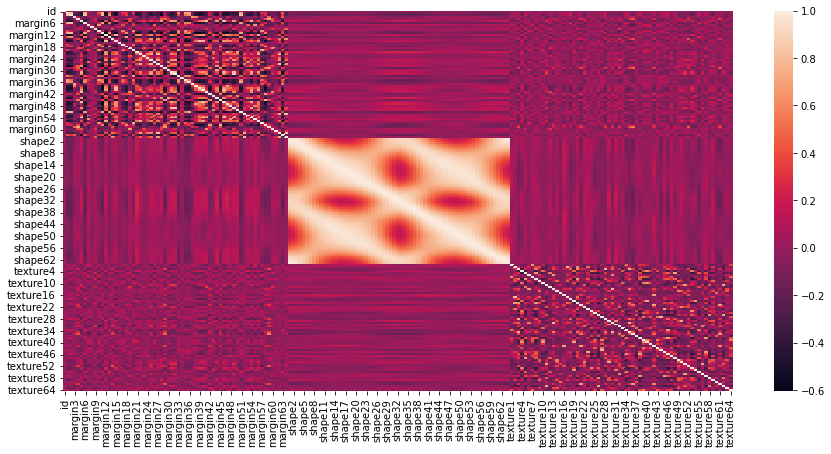

In [22]:
plt.figure(figsize=(15,7))
sns.heatmap(data=train_df.corr())

In [23]:
X = train_df.drop(['id','species'],axis=1)
Y = train_df['species']

In [24]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_fit = encoder.fit(train_df['species'])
y_label = y_fit.transform(train_df['species']) 
classes = list(y_fit.classes_) 
classes

['Acer_Capillipes',
 'Acer_Circinatum',
 'Acer_Mono',
 'Acer_Opalus',
 'Acer_Palmatum',
 'Acer_Pictum',
 'Acer_Platanoids',
 'Acer_Rubrum',
 'Acer_Rufinerve',
 'Acer_Saccharinum',
 'Alnus_Cordata',
 'Alnus_Maximowiczii',
 'Alnus_Rubra',
 'Alnus_Sieboldiana',
 'Alnus_Viridis',
 'Arundinaria_Simonii',
 'Betula_Austrosinensis',
 'Betula_Pendula',
 'Callicarpa_Bodinieri',
 'Castanea_Sativa',
 'Celtis_Koraiensis',
 'Cercis_Siliquastrum',
 'Cornus_Chinensis',
 'Cornus_Controversa',
 'Cornus_Macrophylla',
 'Cotinus_Coggygria',
 'Crataegus_Monogyna',
 'Cytisus_Battandieri',
 'Eucalyptus_Glaucescens',
 'Eucalyptus_Neglecta',
 'Eucalyptus_Urnigera',
 'Fagus_Sylvatica',
 'Ginkgo_Biloba',
 'Ilex_Aquifolium',
 'Ilex_Cornuta',
 'Liquidambar_Styraciflua',
 'Liriodendron_Tulipifera',
 'Lithocarpus_Cleistocarpus',
 'Lithocarpus_Edulis',
 'Magnolia_Heptapeta',
 'Magnolia_Salicifolia',
 'Morus_Nigra',
 'Olea_Europaea',
 'Phildelphus',
 'Populus_Adenopoda',
 'Populus_Grandidentata',
 'Populus_Nigra',
 'Pr

In [25]:
from sklearn.model_selection import  train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y_label, test_size = 0.2, random_state =1)

In [26]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 40)
classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [27]:
from sklearn.metrics import classification_report
predictions = classifier.predict(x_test)
print (classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         3
          10       0.33      1.00      0.50         1
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         2
          17       1.00    

In [28]:
final_predictions = classifier.predict_proba(test_data)

In [29]:
submission = pd.DataFrame(final_predictions, columns=classes)
submission.insert(0, 'id', test_ids)
submission.reset_index()

,index,id,Acer_Capillipes,Acer_Circinatum,Acer_Mono,Acer_Opalus,Acer_Palmatum,Acer_Pictum,Acer_Platanoids,Acer_Rubrum,Acer_Rufinerve,Acer_Saccharinum,Alnus_Cordata,Alnus_Maximowiczii,Alnus_Rubra,Alnus_Sieboldiana,Alnus_Viridis,Arundinaria_Simonii,Betula_Austrosinensis,Betula_Pendula,Callicarpa_Bodinieri,Castanea_Sativa,Celtis_Koraiensis,Cercis_Siliquastrum,Cornus_Chinensis,Cornus_Controversa,Cornus_Macrophylla,Cotinus_Coggygria,Crataegus_Monogyna,Cytisus_Battandieri,Eucalyptus_Glaucescens,Eucalyptus_Neglecta,Eucalyptus_Urnigera,Fagus_Sylvatica,Ginkgo_Biloba,Ilex_Aquifolium,Ilex_Cornuta,Liquidambar_Styraciflua,Liriodendron_Tulipifera,Lithocarpus_Cleistocarpus,...,Quercus_Coccinea,Quercus_Crassifolia,Quercus_Crassipes,Quercus_Dolicholepis,Quercus_Ellipsoidalis,Quercus_Greggii,Quercus_Hartwissiana,Quercus_Ilex,Quercus_Imbricaria,Quercus_Infectoria_sub,Quercus_Kewensis,Quercus_Nigra,Quercus_Palustris,Quercus_Phellos,Quercus_Phillyraeoides,Quercus_Pontica,Quercus_Pubescens,Quercus_Pyrenaica,Quercus_Rhysophylla,Quercus_Rubra,Quercus_Semecarpifolia,Quercus_Shumardii,Quercus_Suber,Quercus_Texana,Quercus_Trojana,Quercus_Variabilis,Quercus_Vulcanica,Quercus_x_Hispanica,Quercus_x_Turneri,Rhododendron_x_Russellianum,Salix_Fragilis,Salix_Intergra,Sorbus_Aria,Tilia_Oliveri,Tilia_Platyphyllos,Tilia_Tomentosa,Ulmus_Bergmanniana,Viburnum_Tinus,Viburnum_x_Rhytidophylloides,Zelkova_Serrata
0,0,4,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.025,0.000,0.000,0.000,0.000,0.025,0.0,0.000,0.0,0.000,0.025,0.0,0.00,0.000,0.000,0.050,0.025,0.000,0.0,0.000,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,0.025,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.025,0.15,0.000,0.0,0.025,0.000,0.000,0.000,0.000,0.0,0.025,0.000,0.000,0.0,0.05,0.0,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.05,0.000
1,1,7,0.000,0.000,0.050,0.000,0.000,0.00,0.050,0.025,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.050,0.000,0.000,0.0,0.000,0.0,0.000,0.000,0.0,0.00,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.0,0.0,...,0.025,0.000,0.025,0.000,0.000,0.000,0.025,0.000,0.000,0.000,0.025,0.000,0.000,0.0,0.000,0.000,0.00,0.025,0.0,0.000,0.000,0.025,0.000,0.025,0.0,0.000,0.000,0.000,0.0,0.00,0.0,0.000,0.000,0.0,0.0,0.025,0.000,0.000,0.00,0.000
2,2,9,0.000,0.325,0.000,0.000,0.075,0.05,0.000,0.000,0.050,0.025,0.025,0.000,0.025,0.000,0.100,0.00,0.125,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.0,0.000,0.050,0.0,0.00,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.0,0.0,...,0.000,0.025,0.000,0.000,0.000,0.000,0.025,0.025,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.00,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.025,0.0,0.00,0.0,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.00,0.000
3,3,12,0.000,0.000,0.000,0.050,0.000,0.00,0.000,0.000,0.000,0.025,0.000,0.075,0.000,0.025,0.025,0.00,0.000,0.000,0.000,0.300,0.000,0.000,0.0,0.000,0.0,0.000,0.000,0.0,0.00,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.0,0.0,...,0.000,0.000,0.000,0.000,0.025,0.000,0.000,0.000,0.050,0.000,0.000,0.000,0.025,0.0,0.000,0.000,0.00,0.000,0.0,0.000,0.050,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.0,0.00,0.0,0.000,0.025,0.0,0.0,0.000,0.025,0.025,0.00,0.050
4,4,13,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.125,0.000,0.000,0.100,0.100,0.050,0.450,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.025,0.0,0.025,0.000,0.0,0.00,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.00,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.0,0.00,0.0,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.00,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,589,1576,0.000,0.475,0.000,0.000,0.025,0.0

In [30]:
submission.to_csv('result.csv', index = False)